In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [2]:
path_file = "C:/Users/user/Desktop/pipe/Proyecto/Datos_Generales/Apendice_E.xlsx"
dta = pd.read_excel(path_file)
df = pd.DataFrame(dta)

path_file_2018 = "C:/Users/user/Desktop/pipe/Proyecto/Datos_Generales/Apendice_J.xlsx"
dta_2018 = pd.read_excel(path_file_2018)
df_2018 = pd.DataFrame(dta_2018)

In [3]:
dta.drop(['PUBLICI'], axis=1, inplace=True)
dta

,ARRIENDO,SERVINT,TRANSP,SERVEXT2,TOTAL_REM2,TOTPERSO,INVPRO,CTO,VENTA
0,0.006629,0.005813,0.008565,0.009248,0.010228,0.001605,0.017845,0.016319,0.420915
1,0.000261,0.000262,0.001022,0.002215,0.001246,0.001783,0.008055,0.003807,0.455799
2,0.006629,0.005813,0.008565,0.009248,0.010228,0.001783,0.017845,0.016319,0.284335
3,0.000104,0.000285,0.000121,0.003956,0.001138,0.001783,0.003645,0.003423,0.447846
4,0.006629,0.005813,0.008565,0.009248,0.010228,0.001961,0.017845,0.016319,0.407667
...,...,...,...,...,...,...,...,...,...
3625,0.000127,0.000866,0.000221,0.000524,0.001358,0.001783,0.000692,0.000763,0.322389
3626,0.000010,0.000954,0.001325,0.000127,0.001947,0.002496,0.001792,0.002143,0.409969
3627,0.000121,0.000537,0.008565,0.009248,0.001062,0.001783,0.000352,0.002049,0.395980
3628,0.006629,0.004568,0.002951,0.006272,0.018687,0.026391,0.007542,0.012081,0.584510


In [4]:
dta_2018

,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,TOT_PERSO,INV_PRO,CTO,VENTA
0,8.860651e-03,0.000189,0.000803,0.000004,0.000604,0.002342,0.007008,0.006278,0.710802
1,7.954228e-04,0.000421,0.000015,0.000035,0.000754,0.002577,0.000069,0.000545,0.701349
2,8.860651e-03,0.000004,0.000001,0.000007,0.000620,0.000000,0.000191,0.000490,0.415860
3,1.312818e-06,0.000520,0.000211,0.000271,0.000106,0.003279,0.000143,0.000887,0.302962
4,2.067429e-08,0.002335,0.000031,0.001847,0.002749,0.011712,0.000453,0.026781,0.836514
...,...,...,...,...,...,...,...,...,...
803,2.002409e-04,0.000009,0.000547,0.000003,0.001220,0.004919,0.003769,0.001568,0.583851
804,1.188772e-06,0.000965,0.000279,0.000212,0.000083,0.001640,0.002676,0.000040,0.174399
805,3.214853e-06,0.000033,0.000233,0.000007,0.000089,0.002577,0.000173,0.003258,0.632336
806,8.434182e-04,0.000088,0.001154,0.000043,0.000029,0.007730,0.000119,0.013579,0.561539


In [5]:
X = pd.DataFrame(dta.iloc[:,0:8].values)
print(X)
X = sm.add_constant(X)
y = dta.iloc[:,[8]]
print(y)

             0         1         2         3         4         5         6  \
0     0.006629  0.005813  0.008565  0.009248  0.010228  0.001605  0.017845   
1     0.000261  0.000262  0.001022  0.002215  0.001246  0.001783  0.008055   
2     0.006629  0.005813  0.008565  0.009248  0.010228  0.001783  0.017845   
3     0.000104  0.000285  0.000121  0.003956  0.001138  0.001783  0.003645   
4     0.006629  0.005813  0.008565  0.009248  0.010228  0.001961  0.017845   
...        ...       ...       ...       ...       ...       ...       ...   
3625  0.000127  0.000866  0.000221  0.000524  0.001358  0.001783  0.000692   
3626  0.000010  0.000954  0.001325  0.000127  0.001947  0.002496  0.001792   
3627  0.000121  0.000537  0.008565  0.009248  0.001062  0.001783  0.000352   
3628  0.006629  0.004568  0.002951  0.006272  0.018687  0.026391  0.007542   
3629  0.000241  0.000285  0.000086  0.000856  0.001527  0.001605  0.000897   

             7  
0     0.016319  
1     0.003807  
2     0.0163

In [6]:
XX = pd.DataFrame(dta_2018.iloc[:,0:8].values)
print(XX)
XX = sm.add_constant(XX)
yy = dta_2018.iloc[:,[8]]
print(yy)

                0         1         2         3         4         5         6  \
0    8.860651e-03  0.000189  0.000803  0.000004  0.000604  0.002342  0.007008   
1    7.954228e-04  0.000421  0.000015  0.000035  0.000754  0.002577  0.000069   
2    8.860651e-03  0.000004  0.000001  0.000007  0.000620  0.000000  0.000191   
3    1.312818e-06  0.000520  0.000211  0.000271  0.000106  0.003279  0.000143   
4    2.067429e-08  0.002335  0.000031  0.001847  0.002749  0.011712  0.000453   
..            ...       ...       ...       ...       ...       ...       ...   
803  2.002409e-04  0.000009  0.000547  0.000003  0.001220  0.004919  0.003769   
804  1.188772e-06  0.000965  0.000279  0.000212  0.000083  0.001640  0.002676   
805  3.214853e-06  0.000033  0.000233  0.000007  0.000089  0.002577  0.000173   
806  8.434182e-04  0.000088  0.001154  0.000043  0.000029  0.007730  0.000119   
807  4.920482e-06  0.000162  0.003404  0.001960  0.000334  0.010307  0.000113   

            7  
0    0.0062

In [7]:
mod_ols = sm.OLS(y, X)
res_ols = mod_ols.fit()
print(res_ols.summary())

y_pred_o = res_ols.predict(X)
error_o = np.sqrt(mean_squared_error(y, y_pred_o))
print('Error: ', error_o)
print('R2: ', res_ols.rsquared,"\n")

y_pred_o2 = res_ols.predict(XX)
error_o2 = np.sqrt(mean_squared_error(yy, y_pred_o2))
r2 = r2_score(yy,y_pred_o2)

print("Datos del predict")
print('Error: ', error_o2)
print('R^2: ',r2)

                            OLS Regression Results                            
Dep. Variable:                  VENTA   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     387.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:14:30   Log-Likelihood:                 3847.0
No. Observations:                3630   AIC:                            -7676.
Df Residuals:                    3621   BIC:                            -7620.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4657      0.002    278.830      0.0

<AxesSubplot:xlabel='VENTA'>

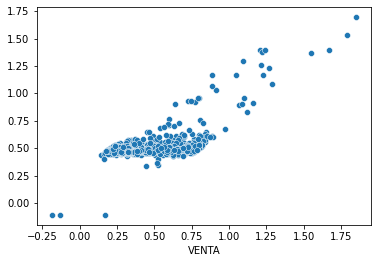

In [8]:
sns.scatterplot(x="VENTA", y=res_ols.predict(XX), data=dta_2018, palette="viridis")